EDA Customer Personality Analysis Dataset

In [33]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("BI_CSP.csv", sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
#check data size
df.shape

#check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can see that except for Income column none of the other columns have missing data as the shape of the data reveals total number of records to be the same as the total number of non-null values in each column. Let's still double check this by counting total missing values in each column.

In [35]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [36]:
#drop records where Income column has null values. This is done because of the perceived insignificance of such low number of records being dropped.
df = df.dropna(subset=['Income'])

df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [37]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We can see that the columns Z_costContact & Z_revenue have the same values in their whole columns respectively thus their presence is of no value.

In [38]:
#dropping Z-costContact & Z-Revenue columns
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

df.iloc[:,1:20].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Earlier we saw that the DT_customer (the date a customer registered itself with the supermarket) is of type object where it should have been of type: datetime.

In [39]:
df["Dt_Customer"] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
type(df['Dt_Customer'])
df['Dt_Customer'].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

Earlier we saw that the oldest customer was born in 1893 which seems to be an error during data entry.

In [40]:
df_temp = df

df_temp = df_temp.sort_values(by="Year_Birth")

df_temp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,1,4,5,0,0,0,0,0,0,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,10,5,2,0,0,1,0,0,0,0


Let's now look into the categorical data before we move to data transformation.

The 2 categorical columns that we have are:
1. Education
2. Marital_status

In [41]:
print("In Marital status column we have these values: {}. \nAnd in Education column we have these values: {}".format(df['Marital_Status'].unique(), df['Education'].unique()))

In Marital status column we have these values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']. 
And in Education column we have these values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Let's start with data transformation, here is the list of task that we need to perform:
1. rename columns for better readability and understanding
2. Rename values present in categorical data for uniformity
3. Add a column that stores the total amount spent across all categories.
4. Extract Age from birth year.
5. Total children in the home.
6. Total Campaigns Accepted.
7. Add Recency_Score, Frequency_Score, Monetary_Score, and RFM_Score for RFM analysis.
8. Add Churn_rusk classifying column.
9. Add favorite category of each customer based on highest spent category
10. Classify users based on their deal preferences
11. Classify users based on their Age.
12. Add an identifier on whether the user has at least one child or not.
13. Add column to store total number of purchases through all the channels combined.

In [42]:
#renaming columns

df = df.rename(columns={
    'Dt_Customer': 'Date_became_customer',
    'Recency': 'numberofdayssincelastpurchase',
    'MntWines': 'AmountspentDrinks',
    'MntFruits': 'AmountspentFruits',
    'MntMeatProducts': 'AmountspentMeat',
    'MntFishProducts': 'AmountspentFish',
    'MntSweetProducts': 'AmountspentSweet',
    'MntGoldProds': 'AmountspentGold',
    'Kidhome': 'Kidsin_home',
    'Teenhome': 'Teenin_home'
})

#reclassifying categorical data

df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Master','Master':'Master','PhD':'PHD'})

print(df['Marital_Status'].value_counts())

print(df['Education'].value_counts())

Marital_Status
Couple    1430
Alone      786
Name: count, dtype: int64
Education
Master           1481
PHD               481
Undergraduate     254
Name: count, dtype: int64


In [43]:
from datetime import datetime

#Add a column that stores the total amount spent across all categories.
df['total_spent']=df[['AmountspentDrinks','AmountspentFruits','AmountspentMeat','AmountspentFish','AmountspentSweet','AmountspentGold']].sum(axis=1)

#Extract Age from birth year.
df['age']= 2015 - df['Year_Birth']

#Total children in the home.
df['total_children']=df['Kidsin_home']+df['Teenin_home']

#Total Campaigns Accepted.
df['total_camp_accepted']=df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1)

df[['age', 'total_spent', 'total_children', 'total_camp_accepted']].describe()

,age,total_spent,total_children,total_camp_accepted
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,46.179603,607.075361,0.947202,0.298285
std,11.985554,602.900476,0.749062,0.679209
min,19.000000,5.000000,0.000000,0.000000
25%,38.000000,69.000000,0.000000,0.000000
50%,45.000000,396.500000,1.000000,0.000000
75%,56.000000,1048.000000,1.000000,0.000000
max,122.000000,2525.000000,3.000000,4.000000


In [ ]:
# Calculate RFM scores
df['Recency_Score'] = pd.qcut(df['numberofdayssincelastpurchase'], 5, labels=[5,4,3,2,1])
df['Frequency_Score'] = pd.qcut(df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'], 5, labels=[1,2,3,4,5])
df['Monetary_Score'] = pd.qcut(df['total_spent'], 5, labels=[1,2,3,4,5])

# Create RFM total score
df['RFM_Score'] = df[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

# Flag high-risk customers (Top 20% spenders with 60+ days since purchase)
high_value = df['total_spent'] > np.percentile(df['total_spent'], 80)
inactive = df['numberofdayssincelastpurchase'] > 60
df['Churn_Risk'] = np.where(high_value & inactive, "High Risk", "Low Risk")

df[['RFM_Score']].describe()

,RFM_Score
count,2216.000000
mean,8.912004
std,3.077028
min,3.000000
25%,6.000000
50%,9.000000
75%,11.000000
max,15.000000


In [45]:
#Add favorite category of each customer based on highest spent category
category_cols = ['AmountspentDrinks','AmountspentFruits','AmountspentMeat','AmountspentFish','AmountspentSweet','AmountspentGold']

df['fav_category'] = df[category_cols].idxmax(axis=1)

df['fav_category']=df['fav_category'].replace({'AmountspentDrinks':'Drinks','AmountspentFruits':'Fruits','AmountspentMeat':'Meat','AmountspentFish':'Fish','AmountspentSweet':'Sweet','AmountspentGold':'Gold'})

df[['AmountspentDrinks','AmountspentFruits','AmountspentMeat','AmountspentFish','AmountspentSweet','AmountspentGold', 'fav_category']].head()

,AmountspentDrinks,AmountspentFruits,AmountspentMeat,AmountspentFish,AmountspentSweet,AmountspentGold,fav_category
0,635,88,546,172,88,88,Drinks
1,11,1,6,2,1,6,Drinks
2,426,49,127,111,21,42,Drinks
3,11,4,20,10,3,5,Meat
4,173,43,118,46,27,15,Drinks


In [46]:
#Classify users based on their deal preferences
df['Deal_User_Type'] = pd.cut(df['NumDealsPurchases'],
                              bins=[-1, 1, 3, 100],
                              labels=['Light', 'Medium', 'Heavy'])

#Classify users based on their Age.
df['Age_group'] = pd.cut(df['age'],
                              bins=[14, 24, 64, 200],
                              labels=['Youth', 'Adult', 'Senior'])

#classify users to indicate if they have or don't have children
df['Has_child'] = np.where(df.total_children> 0, 'Has child', 'No child')

df[['Has_child', 'Age_group', 'Deal_User_Type']].head()

,Has_child,Age_group,Deal_User_Type
0,No child,Adult,Medium
1,Has child,Adult,Medium
2,No child,Adult,Light
3,Has child,Adult,Medium
4,Has child,Adult,Heavy


In [47]:
#Add column to store total number of purchases through all the channels combined.

df['total_purchases'] = df[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']].sum(axis=1)

Let's now check the final look of our processed data.

In [48]:
print(df.shape)

print(df.info())

(2216, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             2216 non-null   int64         
 1   Year_Birth                     2216 non-null   int64         
 2   Education                      2216 non-null   object        
 3   Marital_Status                 2216 non-null   object        
 4   Income                         2216 non-null   float64       
 5   Kidsin_home                    2216 non-null   int64         
 6   Teenin_home                    2216 non-null   int64         
 7   Date_became_customer           2216 non-null   datetime64[ns]
 8   numberofdayssincelastpurchase  2216 non-null   int64         
 9   AmountspentDrinks              2216 non-null   int64         
 10  AmountspentFruits              2216 non-null   int64         
 11  Amountspent

<Axes: >

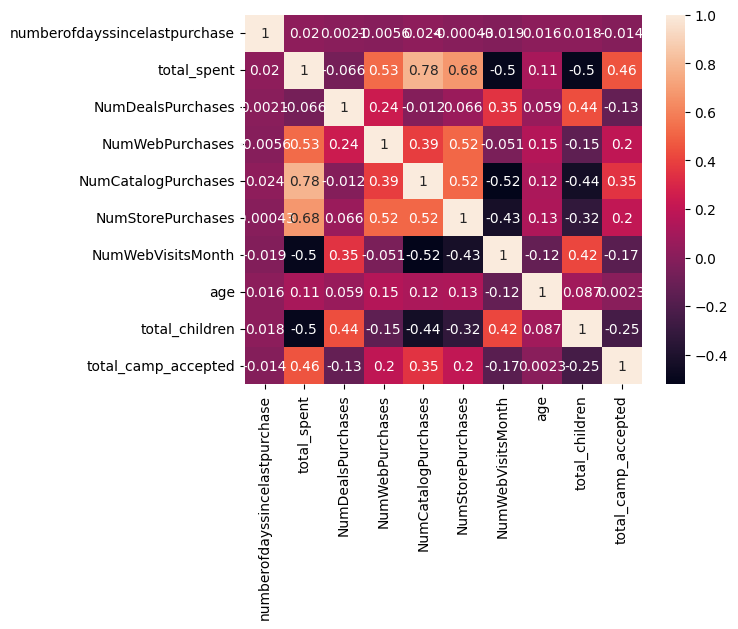

In [49]:
import seaborn as sns
'''' 'AmountspentDrinks',
       'AmountspentFruits', 'AmountspentMeat', 'AmountspentFish',
       'AmountspentSweet', 'AmountspentGold', Kidsin_home', 'Teenin_home', 'Complain', 'Response',
       'total_purchases', 'Recency_Score', 'Frequency_Score',
       'Monetary_Score', 'RFM_Score', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', '''

columns = ['Education', 'Marital_Status', 'Income',
       'Date_became_customer',
       'numberofdayssincelastpurchase', 'total_spent', 'NumDealsPurchases', 
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'age', 'total_children',
       'total_camp_accepted', 'Churn_Risk', 'fav_category',
       'Deal_User_Type', 'Age_group', 'Has_child']

df_numeric = df[columns].select_dtypes(include=['number'])

sns.heatmap(df_numeric.iloc[:,1:].corr(), annot=True)

In [50]:
# Compare deal users vs non-deal users
deal_analysis = df.groupby('Deal_User_Type').agg(
    Avg_Income=('Income', 'mean'),
    Avg_Spending=('total_spent', 'mean'),
    Avg_Recency=('numberofdayssincelastpurchase', 'mean'),
    Customer_Count=('ID', 'count')
).reset_index()

deal_analysis

C:\Users\farru\AppData\Local\Temp\ipykernel_10544\2893678824.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deal_analysis = df.groupby('Deal_User_Type').agg(


,Deal_User_Type,Avg_Income,Avg_Spending,Avg_Recency,Customer_Count
0,Light,57357.745020,745.011952,48.779880,1004
1,Medium,46492.703562,448.791349,49.022901,786
2,Heavy,50820.347418,574.030516,49.542254,426


In [51]:
df.to_csv(r'E:\MWP temp\Job hunting\BI Customer Segmentation Project\BI_CSP_processed.csv', index=False)

In [52]:
# Load both datasets
df1 = pd.read_csv("BI_CSP_processed.csv")        # Dataset missing Country
df2 = pd.read_csv("BIFP processed data v1.csv")  # Dataset with Country

# Merge the Country column from df2 to df1 using the ID column
merged_df = df1.merge(
    df2[['ID', 'Country']],    # Select only ID and Country from second dataset
    on='ID',                   # Join on the shared ID column
    how='left'                 # Keep all rows from first dataset
)

# Save the updated dataset (optional)
merged_df.to_csv("BI_CSP_processed.csv", index=False)

In [53]:
# List of valid countries
valid_countries = ['SP', 'CA', 'SA', 'GER', 'IND', 'AUS', 'US']

# Identify missing values
mask = merged_df['Country'].isna() | (merged_df['Country'] == '')  # Handle both NaN and empty strings

# Generate random countries for missing values
random_countries = np.random.choice(valid_countries, size=mask.sum(), replace=True)

# Impute values
merged_df.loc[mask, 'Country'] = random_countries

In [54]:
# Save the updated dataset (optional)
merged_df.to_csv("BI_CSP_processed.csv", index=False)

In [55]:
merged_df['Country']=merged_df['Country'].replace({'SP':'Spain', 'CA': 'Canada', "SA": "South Africa", "GER": "Germany", "IND": "India", 'AUS': "Australia", 'US': "USA"})

# Save the updated dataset (optional)
merged_df.to_csv("BI_CSP_processed.csv", index=False)